# Sprint4 機械学習スクラッチロジスティック回帰   

この課題の目的
- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
% matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

## 【問題1】 ロジスティック回帰のクラスを作成する

ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前は<font color="Red">ScratchLogisticRegression</font>としてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

### シグモイド関数

シグモイド関数を実装しましょう。

$$ g(z) = \frac{1}{1+e^{-z}} $$

正しく動作しているかを確認するために、この関数に-10から10の値を入力したときの出力をプロットしておいてください。

In [2]:
def sigmoid(z):
    '''
    シグモイド関数の関数
    
    Parameter
    --------------
    z : 次の形のndarray, shape (n_sanples, 1)
        ある範囲の配列
        
    Returns
    -----------
    シグモイド関数
    '''
    return 1 / (1 + np.exp(-z))

- シグモイド関数に10~10の値を入力

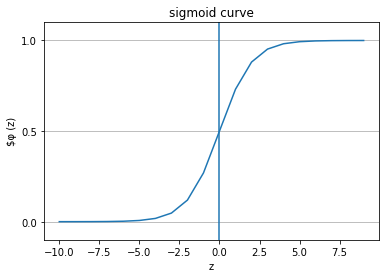

In [3]:
#-10~10のnumpy配列を作成
z = np.arange(-10, 10)[:, np.newaxis]

#シグモイド関数にzを入力
phi_z = sigmoid(z)

#シグモイド曲線を出力
plt.plot(z, phi_z)
plt.axvline(0)
plt.ylim(-0.1, 1.1)
plt.title('sigmoid curve')
plt.xlabel('z')
plt.ylabel('$φ (z)')
plt.yticks([0, 0.5, 1])
plt.gca().yaxis.grid(True)
plt.show()

縦軸が0~1の範囲内で、シグモイド曲線が作成された。   

### 目的関数

正しく動作しているかを確認するために、この関数に-10から10の値を入力したときの出力をプロットしておいてください。   
$$ h_\theta(x) = g(\theta^T x) $$   
$$ g(z) = \frac{1}{1+e^{-z}} $$   
$$ J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[-y^{(i)} log(h_\theta(x^{(i)})) - (1-y^{(i)}) log(1-h_\theta(x^{(i)}))] +
\frac{\lambda}{2m}\sum_{j=1}^n \theta^2_j $$   
$ m $ : 入力されるデータの数   
$ h_\theta() $ : 仮定関数   
$ x $ : 特徴量ベクトル   
$ \theta $ : パラメータベクトル   
$ g() $ : シグモイド関数   
$ x^{(i)} $ :i 番目のサンプルの特徴量ベクトル   
$ y^{(i)} $ :i 番目のサンプルの正解ラベル   
$ \theta_j $ :j 番目のパラメータ(重み)   
$ n $ : 特徴量の数   
$ \lambda $ : 正則化パラメータ

とりあえず適当に値を決める。

In [4]:
#適当に配列等を定義
#x
x = np.array([[1, 5, 3],
                    [1, 3, 2],
                    [1, 5, 6], 
                    [1, 2, 2]])

#theta
np.random.seed(0)
theta = np.random.randn(x.shape[1])[np.newaxis, :]

#y
y = np.array([[1],
                     [1],
                     [2],
                     [2]])

#学習率
eta = 0.1

#正則化パラメータ
lam = 0.1

In [5]:
#仮定関数
y_hat = sigmoid(np.dot(x, theta.T))
y_hat

array([[0.99877189],
       [0.99276813],
       [0.99993475],
       [0.98924789]])

式を分解して、ひとつずつ計算する。   
$ -y^{(i)}log(h^{}_{0}(x^{(i)})) $

In [6]:
-y * np.log(y_hat)

array([[0.00122886],
       [0.00725814],
       [0.0001305 ],
       [0.02162067]])

$ (1 - y^{(i)})log(1- h^{}_{0}(x^{(i)})) $

In [7]:
(1 - y) * np.log(1 - y_hat)

array([[-0.        ],
       [-0.        ],
       [ 9.63733154],
       [ 4.53265306]])

$ \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h^{}_{0}(x^{(i)})) - (1 - y^{(i)})log(1- h^{}_{0}(x^{(i)}))] $

In [8]:
#空のリスト
j_list = []

#i番目のインデックスを計算し、リストに格納
for i in range(x.shape[0]):
    j_list.append((-y[i] * np.log(y_hat[i])) - ((1 - y[i]) * np.log(1 - y_hat[i])))

#出力
print('インデックスごとに計算した値', j_list)

#リストの合計を出力
j_list_sum = (sum(j_list))
print('インデックスの合計', j_list_sum)

#リストの合計をデータ数(インデックス数)で割る
print('インデックス数で割った値', j_list_sum / x.shape[0])

インデックスごとに計算した値 [array([0.00122886]), array([0.00725814]), array([-9.63720104]), array([-4.5110324])]
インデックスの合計 [-14.13974644]
インデックス数で割った値 [-3.53493661]


In [9]:
#まとめて計算
np.sum((-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))) / x.shape[0]

-3.5349366087838185

$ \frac{\lambda}{2m} \sum_{j=1}^{n} \theta^{2}_{j} $ : 正則化項(過学習を防ぐ)

In [10]:
#空のリスト
theta_list = []

#j番目の特徴量を計算し、リストに格納
for j in range(x.shape[1]):
    theta_list.append(theta[:, j]**2)

#出力
print('パラメータのリスト', theta_list)

#リストの合計を出力
theta_list_sum = sum(theta_list)
print('パラメータのリストの合計', theta_list_sum)

#リストの合計をデータ数(インデックス数)で割る
print('正則化項', (lam / 2 * x.shape[0]) * theta_list_sum)

パラメータのリスト [array([3.11188068]), array([0.16012579]), array([0.95792804])]
パラメータのリストの合計 [4.22993451]
正則化項 [0.8459869]


In [11]:
#まとめて計算
(lam / 2 * x.shape[0]) * np.sum(theta**2)

0.845986902450727

$ \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h^{}_{0}(x^{(i)})) - (1 - y^{(i)})log(1- h^{}_{0}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta^{2}_{j} $

In [12]:
def target_function(X, y, y_hat, theta, lam):
    '''
    目的関数を計算する関数

    Parameter
     --------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データの特徴量
    y : 次の形のndarray, shape (n_samples, 1)
        学習用データの正解値
    y_hat : 次の形のndarray, shape (n_samples, 1)
        仮定関数
    theta : 次の形のndarray, shape (n_features, 1)
        パラメータ 
    lam : float
        正則化パラメータ 

    Returns
    -----------
    j : float
        目的関数
    '''    
    j = (np.sum((-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))) / x.shape[0]) + 
                                                                    ((lam / 2 * x.shape[0]) * np.sum(theta**2))
    return j

In [13]:
target_function(x, y, y_hat, theta, lam)

-2.6889497063330916

クラス用に書き換え

In [14]:
def _target_function(self, X, y, y_hat):
    '''
    目的関数を計算する関数

    Parameter
     --------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データの特徴量
    y : 次の形のndarray, shape (n_samples, 1)
        学習用データの正解値
    y_hat : 次の形のndarray, shape (n_samples, 1)
        仮定関数
            
    Returns
    -----------
    j : float
        目的関数
    '''
    j = (np.sum((-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))) / X.shape[0]) + 
                                                ((self.lam / 2 * X.shape[0]) * np.sum(self.theta**2))
    return j

### 最急降下法

最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。   
$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}  ,j = 0 $$   
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \biggr) + \frac{\lambda}{m}\theta_j　 ,j\geq 1 $$   
$ i $ : サンプルのインデックス   
$ j $ : 特徴量のインデックス

In [15]:
#error
error = (y_hat - y)
error

array([[-0.00122811],
       [-0.00723187],
       [-1.00006525],
       [-1.01075211]])

$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}  ,j = 0 $ について計算

In [16]:
#j = 0のとき
#空のリスト
theta0 = []

#インデックスの回数シグマの中を計算
for i in range(x.shape[0]):
    theta0.append(error[i] * x[i, 0])

print('リスト', theta0)

print('合計', sum(theta0))

print('全体', sum(theta0) / x.shape[0])

リスト [array([-0.00122811]), array([-0.00723187]), array([-1.00006525]), array([-1.01075211])]
合計 [-2.01927733]
全体 [-0.50481933]


In [17]:
#まとめて計算
np.dot(error.T, x[:, 0]) / x.shape[0]

array([-0.50481933])

$ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \biggr) + \frac{\lambda}{m}\theta_j　 ,j\geq 1 $ について計算

In [18]:
#j >= 1のとき
#空のリスト
theta1 = []

#インデックスの回数シグマの中を計算
for i in range(x.shape[0]):
    theta1.append(error[i] * x[i, 1:])

print('リスト', theta1)

print('合計', sum(theta1))

print('括弧の中', (sum(theta1) / x.shape[0]))

print('全体', (sum(theta1) / x.shape[0]) + (lam / x.shape[0]) * theta[:, 1:])

リスト [array([-0.00614054, -0.00368432]), array([-0.0216956 , -0.01446373]), array([-5.00032623, -6.00039148]), array([-2.02150422, -2.02150422])]
合計 [-7.04966659 -8.04004376]
括弧の中 [-1.76241665 -2.01001094]
全体 [[-1.75241272 -1.98554249]]


In [19]:
#まとめて計算
(np.dot(error.T, x[:, 1:]) / x.shape[0]) + ((lam / x.shape[0]) * theta[:, 1:])

array([[-1.75241272, -1.98554249]])

更新式 $ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) $ について計算

In [20]:
#j = 0のときの更新されたパラメータ
eta = 0.1
newtheta0 = theta[:, 0] - eta * (np.dot(error.T, x[:, 0]) / x.shape[0])
print(newtheta0)

[1.81453428]


In [21]:
#j >= 1のときの更新されたパラメータ
newtheta1 = theta[:, 1:] - eta * ((np.dot(error.T, x[:, 1:]) / x.shape[0]) + ((lam / x.shape[0]) * theta[:, 1:]))
print(newtheta1)

[[0.57539848 1.17729223]]


In [22]:
def _gradient_descent(X, error, eta, lam):
    '''
    最急降下法でパラメータを更新する関数

    Parameter
    --------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データ
    error : 次の形のndarray, shape (n_samples, 1)
        推定した値と正解値の差
    eta : float
        学習率(0 < eta <= 1の範囲)
    lam : float
        正則化パラメータ 

    Returns
    -----------
    self.coef_ : 次の形のndarray, shape (n_samples, 1)
        更新されたパラメータ   
    '''            
    theta[:, 0] = theta[:, 0] - eta * (np.dot(error.T, x[:, 0]) / x.shape[0])
    theta[:, 1:] = theta[:, 1:] - eta * ((np.dot(error.T, x[:, 1:]) / x.shape[0]) + ((lam / x.shape[0]) * theta[:, 1:]))

    print(theta)

In [23]:
_gradient_descent(x, error, eta, lam)

[[1.81453428 0.57539848 1.17729223]]


クラス用に書き換える

In [24]:
def _gradient_descent(self, X, error):
    '''
    最急降下法でパラメータを更新する関数

    Parameter
    --------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データ
    error : 次の形のndarray, shape (n_samples, 1)
        推定した値と正解値の差

    Returns
    -----------
    self.coef_ : 次の形のndarray, shape (n_samples, 1)
        更新されたパラメータ   
    '''        
    #特徴量のインデックスが0の場合
    self.coef_[:, 0] = self.coef_[:, 0] - self.eta * (np.dot(error.T, X[:, 0]) / X.shape[0])
    #特徴量のインデックスが1以上の場合
    self.coef_[:, 1:] = self.coef_[:, 1:] - self.eta * ((np.dot(error.T, X[:, 1:]) / X.shape[0]) +
                                                                                    ((self.lam / X.shape[0]) * self.coef_[:, 1:]))
        
    return self.coef_

### ロジスティック回帰のクラス作成

- irisデータの読み込み   
irisの種類はversicolorとvirginicaの2種類、特徴量はpetal lengthとpetal widthの2種類を選択する。

In [25]:
#irisデータセットの読み込み
iris = datasets.load_iris()

#説明変数をX_dfに、目的変数をy_dfに格納し、列目を付ける
X_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(iris.target, columns=['Species'])

#結合
df = pd.concat([X_df, y_df], axis=1)

#抜き出し
df = df[(df['Species'] == 1) | (df['Species'] == 2)][['petal length (cm)', 'petal width (cm)', 'Species']]
df.head()

,petal length (cm),petal width (cm),Species
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [26]:
#説明変数をX、目的変数をyというndarrayに格納
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [27]:
#学習用データをfit(平均と標準偏差を計算)し、transform(標準化)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

#検証用データをtransform(標準化)
X_test_std = sc.transform(X_test)

In [28]:
import numpy as np

class ScratchLogisticRegression():
    '''
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
        イテレーション数
    eta : float
        学習率(0 < eta <= 1の範囲)
    lam : float
        正則化パラメータ
    bias : bool
        バイアス項を入れない場合はFalse
    verbose : bool
        学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
        パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
        学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
        検証用データに対する損失の記録
    self.y : list
        学習用データのラベルを入れるリスト
    self.y_val : list
        検証用データのラベルを入れるリスト
    '''
    def __init__(self, num_iter=200, eta=0.05, lam=1, bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter        = num_iter      #イテレーション数
        self.eta        = eta                #学習率
        self.lam        = lam               #正則化パラメータ
        self.bias       = bias              #バイアス項(True : あり, False : なし)
        self.verbose = verbose      #学習過程(True : 出力する, False : 出力しない)

        # 損失を記録する配列を用意
        self.loss       = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        #パラメータを用意
        np.random.seed(1)
        self.coef_ = 0
        
        #yのラベルを入れるリストを用意
        self.y = []
        self.y_val = []

        
    def fit(self, X, y, X_val=None, y_val=None):
        '''
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値     
        '''
        #1次元なら2次元にする
        if X.ndim == 1:
            X = X[:, np.newaxis]
        if y.ndim == 1:
            y = y[:, np.newaxis]
            
        #yのラベルのユニーク値をリストに保管
        self.y = []
        self.y.append(np.unique(y)[0])
        self.y.append(np.unique(y)[1])

        #yをコピーし、0, 1に変換
        y_copy = y.copy()
        y_copy[y_copy == np.unique(y_copy)[0]] = 0
        y_copy[y_copy == np.unique(y_copy)[1]] = 1
    
        #検証用データあり
        if X_val is not None and y_val is not None:
            if X_val.ndim == 1:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]
                
            #y_valのラベルのユニーク値をリストに保管
            self.y_val = []
            self.y_val.append(np.unique(y)[0])
            self.y_val.append(np.unique(y)[1])

            #y_valを変換0, 1に変換
            y_val_copy = y_val.copy()
            y_val_copy[y_val_copy == np.unique(y_val_copy)[0]] = 0
            y_val_copy[y_val_copy == np.unique(y_val_copy)[1]] = 1    

        #バイアス項あり
        if self.bias == True:
            #1列目に1の配列を挿入
            X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
            
            #検証用データあり
            if X_val is not None and y_val is not None:
                #1列目に1の配列を挿入
                X_val = np.insert(X_val, 0, np.ones(X_val.shape[0]), axis=1)

        #パラメータをランダムに設定
        self.coef_ = np.random.randn(X.shape[1])[np.newaxis, :]     
        
        '''
        ここから学習
        '''
        for i in range(self.iter):
            # 線形結合
            linear_join = self._logistic_hypothesis(X)

            #シグモイド関数で推定
            y_hat = self._sigmoid(linear_join)
   
            #エラーの計算
            error = y_hat - y_copy
            
            #損失の記録を格納
            cost = np.sum((-y_copy * np.log(y_hat)) - ((1 - y_copy) * np.log(1 - y_hat))) / X.shape[0]
            self.loss[i] += cost
            
            #パラメータの更新
            self.coef_ = self._gradient_descent(X, error)

            #検証用データあり
            if X_val is not None and y_val is not None:
                # 線形結合
                val_linear_join = self._logistic_hypothesis(X_val)

                #シグモイド関数で推定
                y_val_hat = self._sigmoid(val_linear_join)

                #損失の記録を格納
                cost_val = np.sum((-y_val_copy * np.log(y_val_hat)) - 
                                                  ((1 - y_val_copy) * np.log(1 - y_val_hat))) / X_val.shape[0]
                self.val_loss[i] += cost_val
                
            #学習過程を出力する場合
            if self.verbose == True:
                print('学習用データの学習過程' + str(i + 1) + '番目 : ' + str(self.loss[i]))

                #検証用データあり
                if X_val is not None or y_val is not None:
                    print('検証用データの学習過程' + str(i + 1) + '番目 : ' + str(self.val_loss[i]))


    def predict(self, X, threshold=0.5):
        '''
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        threshold : float
            しきい値

        Returns
        -------
        y_pred : 次の形のndarray, shape (1, n_samples)
            予測したラベル
        '''
        if self.bias == True:
            #Xの1列目に1を挿入
            X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) 
        
        #推定(元のラベルに戻す)
        y_pred = np.where(self._sigmoid(np.dot(X, self.coef_.T)) >= threshold, self.y[1], self.y[0])
            
        return y_pred
    

    def predict_proba(self, X):
        '''
        ロジスティック回帰を使い各クラスに属する確率を推定する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量

        Returns
        -------
        y_pred_proba : 次の形のndarray, shape (n_samples, n_classes)
             各クラスのサンプルの確率
        '''
        if self.bias == True:
            #Xの1列目に1を挿入
            X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) 

        #推定
        y_pred_proba = np.concatenate([1 - self._sigmoid(np.dot(X, self.coef_.T)), 
                                                                   self._sigmoid(np.dot(X, self.coef_.T))], 1)

        return y_pred_proba
                

    def _logistic_hypothesis(self, X):
        '''
        線型結合を行う

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
        次の形のndarray, shape (n_samples, )
            線形結合した結果
        '''
        return np.dot(X, self.coef_.T)
    
    
    def _sigmoid(self, z):
        '''
        シグモイド関数を計算する関数

        Parameter
        --------------
        z : 次の形のndarray, shape (n_sanples, 1)
            ある範囲の配列
        
        Returns
        -----------
        シグモイド関数
        '''
        return 1 / (1 + np.exp(-z))
    

    def _target_function(self, X, y, y_hat):
        '''
        目的関数を計算する関数

        Parameter
        --------------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, 1)
            学習用データの正解値
        y_hat : 次の形のndarray, shape (n_samples, 1)
            仮定関数
            
        Returns
        -----------
        j : float
            目的関数
        '''
        j = (np.sum((-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))) / X.shape[0]) + 
                                                        ((self.lam / 2 * X.shape[0]) * np.sum(self.coef_**2))
        
        return j


    def _gradient_descent(self, X, error):
        '''
        最急降下法でパラメータを更新する関数

        Parameter
        --------------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データ
        error : 次の形のndarray, shape (n_samples, 1)
            推定した値と正解値の差

        Returns
        -----------
        self.coef_ : 次の形のndarray, shape (n_samples, 1)
            更新されたパラメータ   
        '''
        #バイアス項がある場合
        if self.bias == True:
            #特徴量のインデックスが0の場合
            self.coef_[:, 0] = self.coef_[:, 0] - self.eta * (np.dot(error.T, X[:, 0]) / X.shape[0])
            #特徴量のインデックスが1以上の場合
            self.coef_[:, 1:] = self.coef_[:, 1:] - self.eta * ((np.dot(error.T, X[:, 1:]) / X.shape[0]) + 
                                                                                            ((self.lam / X.shape[0]) * self.coef_[:, 1:]))
        
        #バイアス項がない場合
        else:
            self.coef_= self.coef_- self.eta * ((np.dot(error.T, X) / X.shape[0]) + ((self.lam / X.shape[0]) * self.coef_))
        
        return self.coef_

In [29]:
#学習(バイアス項あり、学習過程を出力)
slr= ScratchLogisticRegression(verbose=True)
slr.fit(X_train_std, y_train, X_test_std, y_test)

学習用データの学習過程1番目 : 1.5044330124292549
検証用データの学習過程1番目 : 1.708108203409704
学習用データの学習過程2番目 : 1.4701207286612459
検証用データの学習過程2番目 : 1.6669346138923797
学習用データの学習過程3番目 : 1.4364745501021545
検証用データの学習過程3番目 : 1.6265479436364498
学習用データの学習過程4番目 : 1.4034888301091257
検証用データの学習過程4番目 : 1.5869463116144598
学習用データの学習過程5番目 : 1.3711579636088795
検証用データの学習過程5番目 : 1.5481275686078073
学習用データの学習過程6番目 : 1.3394764578655816
検証用データの学習過程6番目 : 1.5100893959288595
学習用データの学習過程7番目 : 1.3084389917971313
検証用データの学習過程7番目 : 1.472829396313041
学習用データの学習過程8番目 : 1.2780404628813427
検証用データの学習過程8番目 : 1.4363451739916024
学習用データの学習過程9番目 : 1.2482760210272246
検証用データの学習過程9番目 : 1.400634401293437
学習用データの学習過程10番目 : 1.219141089114456
検証用データの学習過程10番目 : 1.3656948695513975
学習用データの学習過程11番目 : 1.1906313702191333
検証用データの学習過程11番目 : 1.3315245225878505
学習用データの学習過程12番目 : 1.1627428418411874
検証用データの学習過程12番目 : 1.298121471607336
学習用データの学習過程13番目 : 1.13547173772545
検証用データの学習過程13番目 : 1.2654839909132016
学習用データの学習過程14番目 : 1.1088145181222813
検証用データの学習過程14番目 : 1.233610

In [30]:
#予測したラベル
y_pred_slr = slr.predict(X_test_std)
y_pred_slr.T

array([[1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 2]])

In [31]:
#各ラベルに属する確率
y_pred_proba = slr.predict_proba(X_test_std)
y_pred_proba

array([[0.65495084, 0.34504916],
       [0.15491383, 0.84508617],
       [0.54323791, 0.45676209],
       [0.06713552, 0.93286448],
       [0.01439151, 0.98560849],
       [0.98921443, 0.01078557],
       [0.69709055, 0.30290945],
       [0.00728735, 0.99271265],
       [0.55689072, 0.44310928],
       [0.90343145, 0.09656855],
       [0.15133693, 0.84866307],
       [0.13776128, 0.86223872],
       [0.20318247, 0.79681753],
       [0.69123459, 0.30876541],
       [0.98695338, 0.01304662],
       [0.9607781 , 0.0392219 ],
       [0.54323791, 0.45676209],
       [0.85426587, 0.14573413],
       [0.38719269, 0.61280731],
       [0.78132183, 0.21867817],
       [0.98695338, 0.01304662],
       [0.00388471, 0.99611529],
       [0.90581133, 0.09418867],
       [0.04919135, 0.95080865],
       [0.04314706, 0.95685294]])

In [32]:
#学習(バイアス項なし、学習過程を出力)
nobias_slr= ScratchLogisticRegression(verbose=True, bias=False)
nobias_slr.fit(X_train_std, y_train, X_test_std, y_test)

学習用データの学習過程1番目 : 0.4333259642334927
検証用データの学習過程1番目 : 0.44456340599388405
学習用データの学習過程2番目 : 0.42822018750828195
検証用データの学習過程2番目 : 0.44053465468834696
学習用データの学習過程3番目 : 0.42326690804290396
検証用データの学習過程3番目 : 0.4366245851493772
学習用データの学習過程4番目 : 0.4184599368820892
検証用データの学習過程4番目 : 0.4328281078084302
学習用データの学習過程5番目 : 0.4137933826646774
検証用データの学習過程5番目 : 0.4291404061754614
学習用データの学習過程6番目 : 0.4092616363410561
検証用データの学習過程6番目 : 0.4255569199841791
学習用データの学習過程7番目 : 0.40485935661485173
検証用データの学習過程7番目 : 0.4220733294587288
学習用データの学習過程8番目 : 0.40058145609140333
検証用データの学習過程8番目 : 0.41868554062727803
学習用データの学習過程9番目 : 0.39642308811275384
検証用データの学習過程9番目 : 0.41538967161218004
学習用データの学習過程10番目 : 0.3923796342567939
検証用データの学習過程10番目 : 0.41218203983054585
学習用データの学習過程11番目 : 0.3884466924766934
検証用データの学習過程11番目 : 0.4090591500431113
学習用データの学習過程12番目 : 0.38462006585575925
検証用データの学習過程12番目 : 0.406017683193195
学習用データの学習過程13番目 : 0.38089575195227116
検証用データの学習過程13番目 : 0.4030544859813156
学習用データの学習過程14番目 : 0.3772699327086052
検証用データの学

In [33]:
#予測したラベル
y_nobias_pred_slr = nobias_slr.predict(X_test_std)
y_nobias_pred_slr.T

array([[1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 2]])

In [34]:
#各ラベルに属する確率
y_nobias_pred_proba = nobias_slr.predict_proba(X_test_std)
y_nobias_pred_proba

array([[0.68462365, 0.31537635],
       [0.19905705, 0.80094295],
       [0.58458943, 0.41541057],
       [0.09456581, 0.90543419],
       [0.01370918, 0.98629082],
       [0.99832021, 0.00167979],
       [0.81630162, 0.18369838],
       [0.00285833, 0.99714167],
       [0.76843433, 0.23156567],
       [0.94223487, 0.05776513],
       [0.13929919, 0.86070081],
       [0.22257289, 0.77742711],
       [0.30634239, 0.69365761],
       [0.74318025, 0.25681975],
       [0.99656748, 0.00343252],
       [0.9834993 , 0.0165007 ],
       [0.58458943, 0.41541057],
       [0.91360031, 0.08639969],
       [0.40630072, 0.59369928],
       [0.81698077, 0.18301923],
       [0.99656748, 0.00343252],
       [0.00139206, 0.99860794],
       [0.96160933, 0.03839067],
       [0.0555121 , 0.9444879 ],
       [0.06341269, 0.93658731]])

## 【問題2】 学習曲線のプロット

学習曲線をプロットしてください。

In [35]:
def model_loss(loss, val_loss, title='model loss'):
    '''
    学習曲線を作成する関数
    
    Parameters
    ----------------
    loss : 次の形のndarray, shape (self.iter,)
        学習用データに対する損失の記録
    val_loss : 次の形のndarray, shape (self.iter,)
        検証用データに対する損失の記録
    title : str
        タイトルの名前 
    '''
    plt.title(title)
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.plot(range(len(loss)), loss, color='red', label='loss')
    plt.plot(range(len(val_loss)), val_loss, color='blue', label='val_loss')
    plt.legend()
    plt.show()

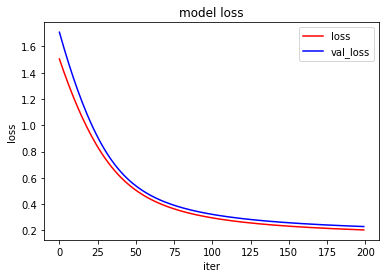

In [36]:
#学習曲線を出力(バイアスあり)
model_loss(slr.loss, slr.val_loss)

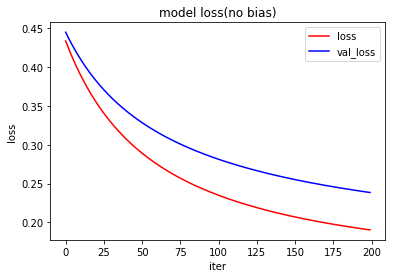

In [37]:
#学習曲線を出力(バイアスなし)
model_loss(nobias_slr.loss, nobias_slr.val_loss, title='model loss(no bias)')

バイアス項ありの学習曲線では、イテレーション回数を増やすにつれ学習用、検証用データの誤差がどちらも同じように減っていた。バイアス項なしでは検証用データが学習用データに比べて途中から誤差の減り具合が悪くなっているように見えるが、縦軸の比率が違うので、数値だけで見ると、最終的な誤差はバイアス項ありの学習用データ0.20、検証用データで0.23、バイアス項なしの学習用データが0.19、検証用データが0.24であったので、それほど変わらなかった。

## 【問題3】 指標値の算出

分類に関する指標値で精度を確認してください。

In [38]:
def evalution(y_test, y_pred):
    '''
     分類問題の指標値を出力する関数
 
     Paraeters
     -------------
    y_test : 次の形のndarray, shape (n_samples, )
        正解値
    y_pred : 次の形のndarray, shape (n_samples, )
        予測したラベル
    '''
    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy :', accuracy)

    #precision
    precision = precision_score(y_test, y_pred)
    print('precision :', precision)

    #recall
    recall = recall_score(y_test, y_pred)
    print('recall :', recall)

    #f1
    f1 = f1_score(y_test, y_pred)
    print('f1 :', f1)

In [39]:
#指標値の出力(バイアス項あり)
evalution(y_test, y_pred_slr)

accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f1 : 0.9285714285714286


In [40]:
#指標値の出力(バイアス項なし)
evalution(y_test, y_nobias_pred_slr)

accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f1 : 0.9285714285714286


sklearnのLogisticLegressionと精度を比較する。

In [41]:
#sklearnと比較
lr = LogisticRegression(solver='lbfgs')

#学習
lr.fit(X_train_std, y_train)

#予測
y_pred_lr = lr.predict(X_test_std)

#指標値の出力
evalution(y_test, y_pred_lr)

accuracy : 0.92
precision : 0.9285714285714286
recall : 0.9285714285714286
f1 : 0.9285714285714286


スクラッチしたクラスで、sklearnと同等の精度を出すことができていた。また、今回バイアス項ありとなしでは精度は変わらなかった。

## 【問題4】 決定領域の可視化

2値分類のデータセットに対して決定領域を可視化してください。

In [42]:
def decision_region(X_train, y_train, model, step=0.01, title='decision region', 
                                xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples, 1)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                                                         np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

スクラッチしたクラスの決定領域

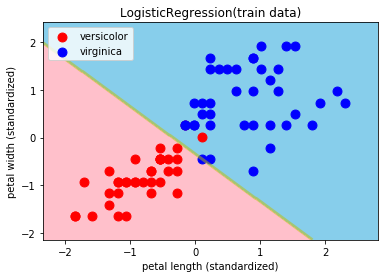

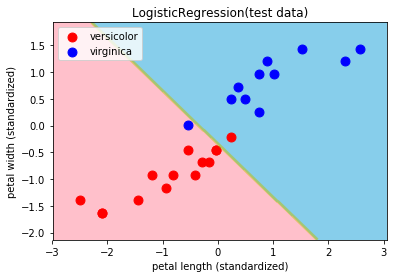

In [43]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, slr, title='LogisticRegression(train data)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

#検証用データ
decision_region(X_test_std, y_test, slr, title='LogisticRegression(test data)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

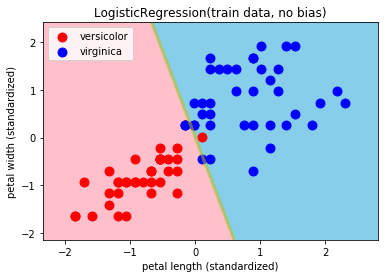

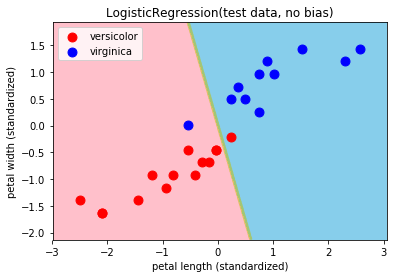

In [44]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, nobias_slr, title='LogisticRegression(train data, no bias)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

#検証用データ
decision_region(X_test_std, y_test, nobias_slr, title='LogisticRegression(test data, no bias)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

sklearnの決定領域

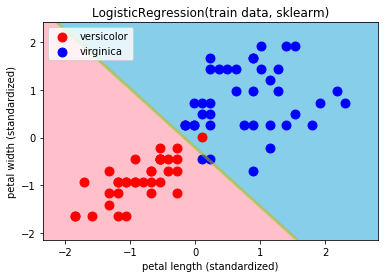

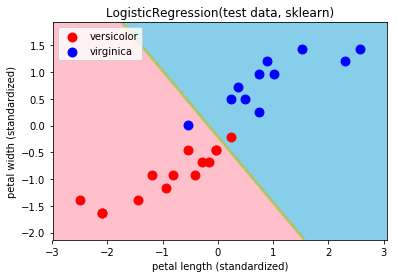

In [45]:
#可視化
#学習用データ
decision_region(X_train_std, y_train, lr, title='LogisticRegression(train data, sklearm)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

#検証用データ
decision_region(X_test_std, y_test, lr, title='LogisticRegression(test data, sklearn)', 
                        xlabel='petal length (standardized)', ylabel='petal width (standardized)')

スクラッチしたクラス(バイアス項あり)とsklearnモデルでは似たような決定領域になっていた。バイアス項ありとなしの比較では、決定境界の傾きがバイアス項なしの場合では急な傾きになっていた。今回はある程度分類できていたが、バイアス項がある方がよりベストな決定境界ではないかと感じた。

## 【問題5】 重みの保存

検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやnumpy.savezを利用します。

[pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント](https://docs.python.org/ja/3/library/pickle.html)

[numpy.savez — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html#numpy.savez)



In [46]:
#学習した重み
slr.coef_

array([[0.4425521 , 1.27151983, 1.28111674]])

In [47]:
#保存
with open('logistic_coef_.pickle', mode='wb') as f:
    pickle.dump(slr.coef_, f)

In [48]:
#読み込み
with open('logistic_coef_.pickle', mode='rb') as f:
    coef = pickle.load(f)

In [49]:
#重みを出力
coef

array([[0.4425521 , 1.27151983, 1.28111674]])

pickleを用いて保存、読み込みを行い、同じであることが確認できた。

## 【問題6】 分類と回帰

最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

- 分類問題と回帰問題は本質的に何が異なっているか   

注意点   
答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。

- 分類問題   
具体的な数字を出すのではなく、各クラスに分けることを行う。　(0 or 1に分けるなど)

- 回帰問題   
連続するデータの予測を行う。(この商品の値段は〇〇円、××円など)